In [1]:
!pip install pygal_maps_ch


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from pandas import read_csv
import seaborn as sns
import ipywidgets as widgets
import pygal

In [3]:
#Importation des données
file="data_emploi_cantons.csv"
df = pd.read_csv(file, sep=';')


**Affichage et Exploitation des données**

In [4]:
#Affichage des 5 premieres lignes 
df.head()

,TIME_PERIOD,GEO,ERWP,ERWL,POP1564,UNIT_MEA,OBS_VALUE,OBS_CONFIDENCE,OBS_STATUS
0,2010,CH040,1,Total,Total,pers,790988.0,0.6410,A
1,2010,CH040,Total,Total,Total,pers,1153705.0,0.1205,A
2,2010,CH021,1,Total,Total,pers,545121.0,0.8064,A
3,2010,CH021,Total,Total,Total,pers,824336.0,0.1226,A
4,2010,CH061,1,Total,Total,pers,213370.0,0.9513,A


In [5]:
#Taille de données
df.shape

(4158, 9)

In [6]:
#liste des cantons 
cantons_counts = df["GEO"].unique()
print("On a des statisuques sur : "+ str(len(cantons_counts)-1) + " cantons")

On a des statisuques sur : 26 cantons


In [7]:
# Afficher le total des valeurs nulles par colonne
df.isnull().sum()

TIME_PERIOD       0
GEO               0
ERWP              0
ERWL              0
POP1564           0
UNIT_MEA          0
OBS_VALUE         8
OBS_CONFIDENCE    8
OBS_STATUS        0
dtype: int64

<AxesSubplot:>

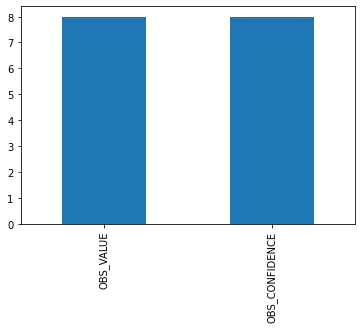

In [8]:
#observation des colonnes  contenant des valeurs null
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

**Ces données ne sont pas complètes sur les années disponibles.
Il manque quelques valeur d'observation**

In [9]:
#On trouve 8 valeurs null dans la colonne de Valeur d'observation et Intervalle de confiance
#On supprime les lignes qui contiennent les valeurs null et on sauvgarde la nouvelle Data frame dans df1
dfNew=df.dropna()

In [10]:
#on verifie s'il reste de valeur null 
dfNew.isnull().sum()

TIME_PERIOD       0
GEO               0
ERWP              0
ERWL              0
POP1564           0
UNIT_MEA          0
OBS_VALUE         0
OBS_CONFIDENCE    0
OBS_STATUS        0
dtype: int64

<BarContainer object of 27 artists>

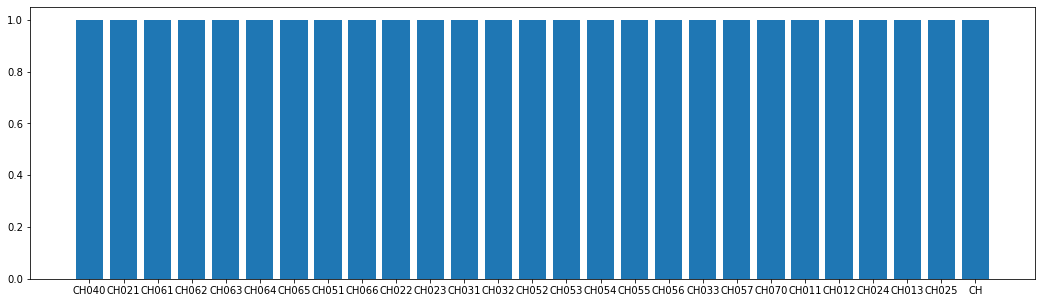

In [11]:
fig, ax = plt.subplots(figsize=(18,5))

ax.bar(cantons_counts, np.array(1), label='Personnes au chomage')

In [12]:
#Afficher un résumé des statistiques descriptives des données (description quatitatives)
dfNew[["OBS_VALUE","OBS_CONFIDENCE"]].describe()

,OBS_VALUE,OBS_CONFIDENCE
count,4.150000e+03,4150.000000
mean,1.596492e+05,2.576461
std,6.459056e+05,6.971004
min,1.118900e+00,0.000000
25%,9.575801e+01,0.233250
50%,1.407620e+02,0.908800
75%,1.067618e+05,1.994250
max,7.187715e+06,86.907700


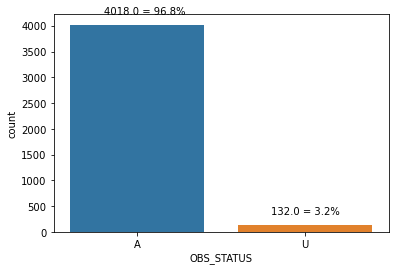

In [13]:
#On verifie le nombre d'occurence de chaque status d'observation
OBS_status_Count=len(dfNew["OBS_STATUS"])
ax = sns.countplot(x="OBS_STATUS", data=dfNew)
for p in ax.patches:
    ax.annotate('{:.1f} = {:.1f}%'.format(p.get_height(),100*p.get_height()/OBS_status_Count), (p.get_x()+0.2, p.get_height()+200))

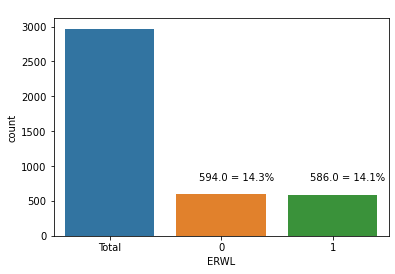

In [14]:
#On verifie le nombre d'occurence de chaque type de population par rapport au personnes au chomage
OBS_chomage_Count=len(dfNew["ERWL"])
ax = sns.countplot(x="ERWL", data=dfNew)
for p in ax.patches:
    ax.annotate('{:.1f} = {:.1f}%'.format(p.get_height(),100*p.get_height()/OBS_chomage_Count), (p.get_x()+0.2, p.get_height()+200))

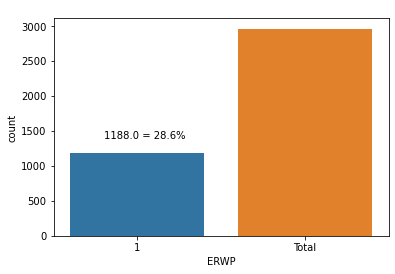

In [15]:
#On verifie le nombre d'occurence de chaque type de population par rapport au personnes actives
OBS_actif_Count=len(dfNew["ERWP"])
ax = sns.countplot(x="ERWP", data=dfNew)
for p in ax.patches:
    ax.annotate('{:.1f} = {:.1f}%'.format(p.get_height(),100*p.get_height()/OBS_actif_Count), (p.get_x()+0.2, p.get_height()+200))

**Les principales données qu'on pense utilisables pour étudier le chomage dans les cantons suisses sont :**

1.   **TIME_PERIOD** : La periode
2.   **GEO** : La localisation
3.   **ERWP** : population concernée par rapport au personnes actives
4.   **ERW**L :  population concernée par rapport au personnes au chomage
5.   **POP1564** :  population concernée par rapport a l'age
6.   **UNIT_MEA** : Unité de mesure
7.   **OBS_VALUE** : La valeur de l'observation





In [16]:
#supprimer la colonne 'OBS_Confidence'
dfNew.drop('OBS_CONFIDENCE', axis=1, inplace=True)

C:\Users\ilyes omri\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
#supprimer la colonne 'OBS_Status'
dfNew.drop('OBS_STATUS', axis=1, inplace=True)

In [18]:
#Data frame pour la population total de Vaud de 2010 jusqu'à  2020
VaudTotalPopulationParAn= dfNew.loc[(df['GEO'] == 'CH011') & (df['ERWP'] == 'Total') & (df['ERWL'] == 'Total') & (df['POP1564'] == 'Total') & (df['UNIT_MEA'] == 'pers' ) ]
VaudTotalPopulationParAn

,TIME_PERIOD,GEO,ERWP,ERWL,POP1564,UNIT_MEA,OBS_VALUE
43,2010,CH011,Total,Total,Total,pers,573030.0
421,2011,CH011,Total,Total,Total,pers,585680.0
799,2012,CH011,Total,Total,Total,pers,596537.0
1177,2013,CH011,Total,Total,Total,pers,608946.0
1555,2014,CH011,Total,Total,Total,pers,619668.0
1933,2015,CH011,Total,Total,Total,pers,630312.0
2311,2016,CH011,Total,Total,Total,pers,640606.0
2689,2017,CH011,Total,Total,Total,pers,647327.0
3067,2018,CH011,Total,Total,Total,pers,652435.0
3445,2019,CH011,Total,Total,Total,pers,657154.0


In [19]:
#Data frame pour le total des chomeurs de Vaud de 2010 jusqu'à  2020
VaudTotalChomageParAn = dfNew.loc[(df['GEO'] == 'CH011') & (df['ERWP'] == 'Total') & (df['ERWL'] == '1') & (df['POP1564'] == '1') & (df['UNIT_MEA'] == 'pers' ) ]
VaudTotalChomageParAn

,TIME_PERIOD,GEO,ERWP,ERWL,POP1564,UNIT_MEA,OBS_VALUE
280,2010,CH011,Total,1,1,pers,25084.0
658,2011,CH011,Total,1,1,pers,25328.0
1036,2012,CH011,Total,1,1,pers,28105.0
1414,2013,CH011,Total,1,1,pers,28392.0
1792,2014,CH011,Total,1,1,pers,29344.0
2170,2015,CH011,Total,1,1,pers,30497.0
2548,2016,CH011,Total,1,1,pers,32235.0
2926,2017,CH011,Total,1,1,pers,31645.0
3304,2018,CH011,Total,1,1,pers,31199.0
3682,2019,CH011,Total,1,1,pers,31063.0


In [20]:
#liste contient les valeur de l'observation ( nombre de chomeurs)
ChommageValue = VaudTotalChomageParAn['OBS_VALUE'].tolist()
#liste contient les valeur de l'observation ( nombre de population)
populationValue = VaudTotalPopulationParAn['OBS_VALUE']
#liste contient les années
annee  = VaudTotalPopulationParAn.TIME_PERIOD


In [21]:
# creation de nouvelle dataFrame à partir  de la liste d'années et liste de population 
stati = pd.DataFrame().assign(annee =annee, population=populationValue)
# ajouter une colonne de liste de nombre de chomeurs
StatData = stati.assign(chomage= ChommageValue )
StatData


,annee,population,chomage
43,2010,573030.0,25084.0
421,2011,585680.0,25328.0
799,2012,596537.0,28105.0
1177,2013,608946.0,28392.0
1555,2014,619668.0,29344.0
1933,2015,630312.0,30497.0
2311,2016,640606.0,32235.0
2689,2017,647327.0,31645.0
3067,2018,652435.0,31199.0
3445,2019,657154.0,31063.0


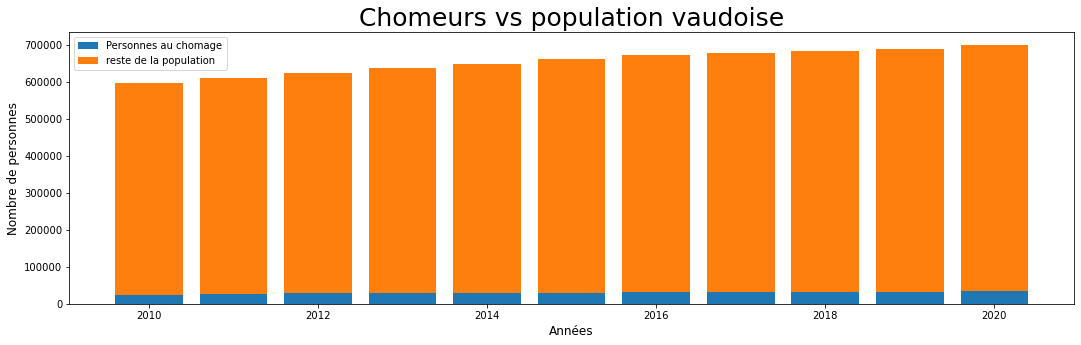

In [22]:
fig, ax = plt.subplots(figsize=(18,5))
#affichage de stats de chomage
ax.bar(StatData.annee, StatData['chomage'], label='Personnes au chomage')
# ajouter le graphe de toute la population
ax.bar(StatData.annee, StatData['population'], bottom=StatData['chomage'],
       label='reste de la population')
ax.set_title('Chomeurs vs population vaudoise',fontsize=25)
ax.set_xlabel('Années',fontsize=12)
ax.set_ylabel('Nombre de personnes',fontsize=12)
ax.legend()

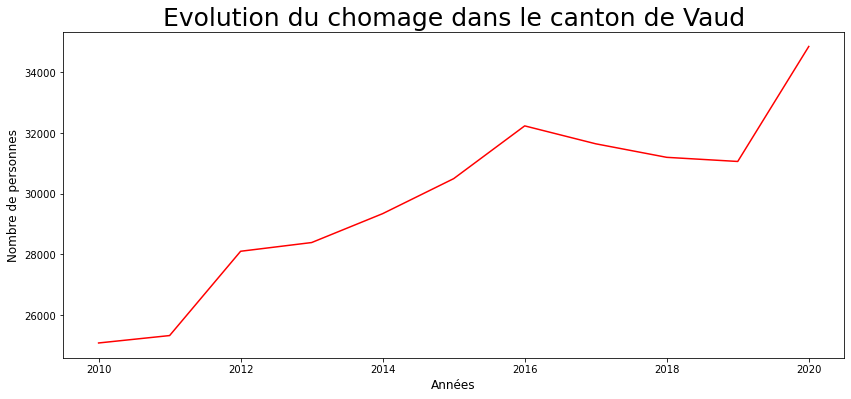

In [23]:
#creation de la courbe à partir des valeurs de listes année et chommageValue déjà créés
x = annee
y = ChommageValue
#changer taille de figure
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(x,y,"r-")

plt.xlabel("Années",fontsize=12)
plt.ylabel("Nombre de personnes",fontsize=12)
plt.title("Evolution du chomage dans le canton de Vaud",fontsize=25)
plt.show()

In [24]:
#supprimer les ligne qui concernent toute la Suisse , pour faciliter l'affichage de map
dfNew.drop(dfNew[(dfNew['GEO']== 'CH') ].index, inplace=True)

C:\Users\ilyes omri\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Carte interactive de la suisse qui représente les données par canton 

In [25]:
#la liste de codes des cantons
listOfCantons= [
    "kt-vd",
    "kt-vs",
    "kt-ge" ,
    "kt-be", 
    "kt-fr",
    "kt-so" ,
    "kt-ne" ,
    "kt-ju" ,
    "kt-bs",
    "kt-bl" ,
    "kt-ag" ,
    "kt-zh" ,
    "kt-gl",
    "kt-sh" ,
    "kt-ar",
    "kt-ai" ,
    "kt-sg" ,
    "kt-gr",
    "kt-tg",
    "kt-lu" ,
    "kt-ur"  ,
    "kt-sz" ,
    "kt-ow" ,
    "kt-nw" , 
    "kt-zg",
    "kt-ti"
]

In [26]:
#fonction pour generer une dataset à partir des filtres , et retourner un dictionnaire de cle : code de cantons , valeur : l'observation
def generate_data(df,date,chomage, age , unite,keys_list):
    new_df = df.loc[(df['TIME_PERIOD'] == date) & (df['ERWP'] == 'Total') & (df['ERWL'] == chomage) & (df['POP1564'] == age) & (df['UNIT_MEA'] == unite ) ]
    #sort the values 
    k = new_df.sort_values(by=['GEO'])
    #supprimer les valeurs dupliqués
    l = k.drop_duplicates(subset=['TIME_PERIOD', 'GEO','ERWP','ERWL','POP1564','UNIT_MEA'], keep='first')
    
    #creer le dict 
    keys_list =listOfCantons
    values_list = l['OBS_VALUE'].tolist()
    zip_iterator = zip(keys_list, values_list)
    map_dictionary = dict(zip_iterator)
    return map_dictionary

In [27]:
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output
# affichage des cartes géographiques pygal dans un notebook 
from IPython.display import display, HTML
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

# cette variable base_html s'utilise pour afficher une carte dans le notebook:
# display(HTML(base_html.format(rendered_chart = ma_carte.render(is_unicode=True))))

In [28]:
#fonction d'affichage de map
def display_map(pers,date,chomage,age):
    ch_chart = pygal.maps.ch.Cantons()
    ch_chart.title = 'La suisse :'+ pers+ "  en "+ str(date)
    #appel à la fonction de generation de dataframe et dictionnaire
    ch_chart.add(pers,generate_data(dfNew,date,chomage,age,pers,listOfCantons))
    
    #ch_chart.render()

    display(HTML(base_html.format(rendered_chart = ch_chart.render(is_unicode=True))))

In [29]:
# creation et affichage des widgets 
def display_widgets():
    output = widgets.Output()
    
    # creation widget pour la langue
    langue = widgets.RadioButtons(
    options=['EN', 'FR', 'DE','IT'],
    value='FR', # Defaults to 'FR'
    description='Langue: ',
    disabled=False
    )
    
    englishOptions = ['Other persons','Unemployed','Total','Resident permanent population of 15 to 64']
    deutchOptions = ['Andere Personen', 'Erwerbslose', 'Total','Ständige Wohnbevölkerung von 15 und 64 Jahren']
    italianOptions = [ 'Altre persone', 'Disoccupati', 'Totale', 'Popolazione residente permanente di 15 a 64 anni' ]
    frenchOptions = ['Autres personnes', 'Personnes au chômage' , 'Total','Population résidente permanente de 15 à 64 ans' ]
 
    # creation widget pour l'année
    date = widgets.IntSlider(
        value=2010,
        min=2010,
        max=2020,
        step=1,
        description='year:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )
    
     # creation widget pour l'unité
    pers = widgets.Dropdown(
        options=['pers', 'pers in %'],
        value='pers',
        description='Unit:',
    )

     # creation widget pour la population
    population = widgets.Dropdown(
        options=[('Population résidente permanente de 15 à 64 ans', 0), ('Total', 1)],
        value=0,
        description='Population:',
    )
    
     # creation widget pour le chomage
    chomage = widgets.Dropdown(
        options=[('Autres personnes', 0), ('Personnes au chômage', 1),('Total', 2)],
        value=2,
        description='Chomage:',
    )
    

        

    
    #event handler pour modifier les labels des autres widget 
    def radio_langue_eventhandler(change):     
        """
        Event handler for the langue dropdown widget
        """
        global radio_input
        
        radio_input = change.new

        if change.new=='EN':
            chomage.options= [(englishOptions[0],0),(englishOptions[1],1),(englishOptions[2],2)]
            population.options =[ (englishOptions[3],0),(englishOptions[2],1) ]
        elif change.new=='DE':
            chomage.options=[(deutchOptions[0],0) , (deutchOptions[1],1), (deutchOptions[2],2)]
            population.options =[ (deutchOptions[3],0),(deutchOptions[2],1) ]
        elif change.new=='IT':
            chomage.options=[(italianOptions[0],0) , (italianOptions[1],1), (italianOptions[2],2)]
            population.options =[ (italianOptions[3],0),(italianOptions[2],1) ]
        else:
            chomage.options=[(frenchOptions[0],0) , (frenchOptions[1],1), (frenchOptions[2],2)]
            population.options =[ (frenchOptions[3],0),(frenchOptions[2],1) ]

            
            
        display(input_widgets)
        
        chom =""
        if chomage.value == 0:
            chom='0'
        elif chomage.value == 1:
            chom = '1'
        else:
            chom = 'Total'

        if population.value == 0 :
            display_map(pers.value,date.value,chom,"1")

        else:
            display_map(pers.value,date.value,chom,"Total")
        IPython.display.clear_output(wait=True)
        


    def slider_year_eventhandler(change):     
        """
        Event handler for the year dropdown widget
        """

        display(input_widgets)
        chom =""
        if chomage.value == 0:
            chom='0'
        elif chomage.value == 1:
            chom = '1'
        else:
            chom = 'Total'
        if population.value == 0 :
            display_map(pers.value,date.value,chom,"1")
        else:
            display_map(pers.value,date.value,chom,"Total")
        
        IPython.display.clear_output(wait=True)
        
        
    def dropdown_pers_eventhandler(change):     
        """
        Event handler for the pers dropdown widget
        """

        
        display(input_widgets)
        chom =""
        if chomage.value == 0:
            chom='0'
        elif chomage.value == 1:
            chom = '1'
        else:
            chom = 'Total'
        if population.value == 0 :
            display_map(pers.value,date.value,chom,"1")

        else:
            display_map(pers.value,date.value,chom,"Total")
       
        IPython.display.clear_output(wait=True)
        
    
    def dropdown_population_eventhandler(change):     
        """
        Event handler for the population dropdown widget
        """
        display(input_widgets)
        chom =""
        if chomage.value == 0:
            chom='0'
        elif chomage.value == 1:
            chom = '1'
        else:
            chom = 'Total'

    
        if population.value == 0 :
            display_map(pers.value,date.value,chom,"1")
        else:
            display_map("pers in %",date.value,chom,"Total")
        
        IPython.display.clear_output(wait=True)
        
        
    def dropdown_chomage_eventhandler(change):     
        """
        Event handler for the chomage dropdown widget
        """
        display(input_widgets)
        chom =""
        if chomage.value == 0:
            chom='0'
        elif chomage.value == 1:
            chom = '1'
        else:
            chom = 'Total'
            

        if population.value == 0 :
            display_map(pers.value,date.value,chom,"1")

        else:
            display_map(pers.value,date.value,chom,"Total")
        
        IPython.display.clear_output(wait=True)
        
        

     
    #observer toute les modifications faites au niveau des widgets
    langue.observe(radio_langue_eventhandler, names='value') 
    date.observe(slider_year_eventhandler, names='value')
    pers.observe(dropdown_pers_eventhandler, names='value')
    chomage.observe(dropdown_chomage_eventhandler, names='value')
    population.observe(dropdown_population_eventhandler, names='value')
    
    interact( population = population, chomage = chomage, langue = langue)
    
    input_widgets = widgets.VBox([langue,date,pers,population,chomage])
    display(input_widgets)
    
    chom =""
    if chomage.value == 0:
        chom='0'
    elif chomage.value == 1:
        chom = '1'
    else:
        chom = 'Total'


    if population.value == 0 :
        display_map(pers.value,date.value,chom,"1")

    else:
        display_map(pers.value,date.value,chom,"Total")
    
    IPython.display.clear_output(wait=True)  

In [30]:
display_widgets()